# Library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss

# Import Data

In [28]:
df = pd.read_csv('Employee Attrition.csv', sep=',').sample(frac=1, random_state=42)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,...,4,80,0,6,4,3,5,4,1,3
184,53,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,...,3,80,2,5,3,3,4,2,1,3
1222,24,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,...,3,80,1,1,2,3,1,0,0,0
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,3,80,1,25,2,3,1,0,0,0
220,36,No,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,No,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1294,41,No,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
860,22,Yes,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3


# Data Processing

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1041 to 1126
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                  

In [30]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [31]:
numerical_col = df.select_dtypes('int64', 'float64')
numerical_col

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1041,28,866,5,3,1,1469,4,84,3,2,...,4,80,0,6,4,3,5,4,1,3
184,53,1084,13,2,1,250,4,57,4,2,...,3,80,2,5,3,3,4,2,1,3
1222,24,240,22,1,1,1714,4,58,1,1,...,3,80,1,1,2,3,1,0,0,0
67,45,1339,7,3,1,86,2,59,3,3,...,3,80,1,25,2,3,1,0,0,0
220,36,1396,5,2,1,304,4,62,3,2,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,750,28,3,1,1596,2,46,4,2,...,4,80,2,10,3,2,10,9,6,8
1294,41,447,5,3,1,1814,2,85,4,2,...,1,80,0,11,3,1,3,2,1,2
860,22,1256,3,4,1,1203,3,48,2,1,...,2,80,1,1,5,3,0,0,0,0
1459,29,1378,13,2,1,2053,4,46,2,2,...,1,80,1,10,2,3,4,3,0,3


In [32]:
for col in numerical_col:
    print(col, ':', sorted(df[col].unique()))

Age : [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
DailyRate : [102, 103, 104, 105, 106, 107, 109, 111, 115, 116, 117, 118, 119, 120, 121, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 157, 160, 161, 163, 164, 167, 168, 170, 172, 174, 176, 177, 179, 180, 181, 182, 185, 188, 189, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 213, 216, 217, 218, 219, 224, 228, 230, 231, 232, 234, 237, 238, 240, 241, 243, 244, 247, 248, 249, 251, 252, 253, 254, 256, 258, 261, 263, 264, 265, 266, 267, 268, 269, 271, 277, 279, 280, 282, 285, 286, 287, 288, 289, 290, 294, 296, 299, 300, 301, 302, 303, 304, 305, 306, 307, 309, 310, 311, 313, 314, 316, 317, 318, 319, 322, 325, 326, 328, 329, 330, 332, 333, 334, 335, 336, 337, 341, 342, 343, 345, 346, 350, 352, 355

In [33]:
categorical_col = df.drop(columns=numerical_col)
categorical_col

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1041,No,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,Y,No
184,No,Travel_Rarely,Research & Development,Medical,Female,Manufacturing Director,Divorced,Y,No
1222,Yes,Travel_Rarely,Human Resources,Human Resources,Male,Human Resources,Married,Y,No
67,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Divorced,Y,No
220,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
...,...,...,...,...,...,...,...,...,...
1130,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Married,Y,No
1294,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,No
860,Yes,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,Yes
1459,No,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Married,Y,Yes


In [34]:
for col in categorical_col:
    print(col, ':', df[col].unique())

Attrition : ['No' 'Yes']
BusinessTravel : ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Medical' 'Human Resources' 'Life Sciences' 'Technical Degree'
 'Marketing' 'Other']
Gender : ['Male' 'Female']
JobRole : ['Sales Executive' 'Manufacturing Director' 'Human Resources'
 'Research Scientist' 'Laboratory Technician' 'Sales Representative'
 'Healthcare Representative' 'Manager' 'Research Director']
MaritalStatus : ['Single' 'Divorced' 'Married']
Over18 : ['Y']
OverTime : ['No' 'Yes']


# Exploratory Data Analysis

In [35]:
df_copy = df.copy()

## Categoraical Features

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


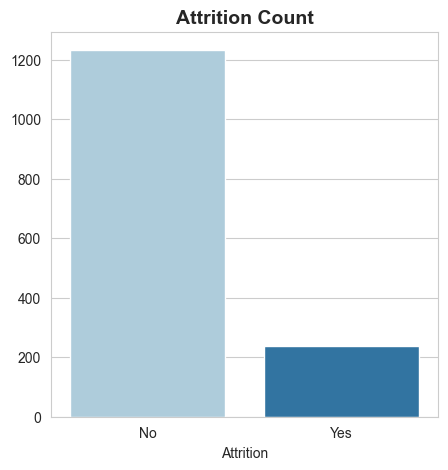

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


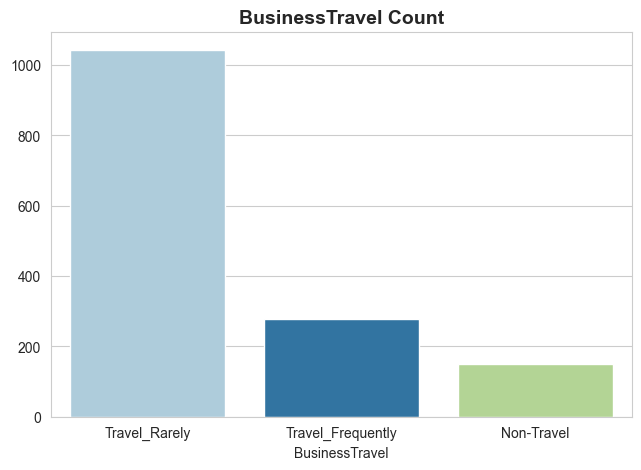

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


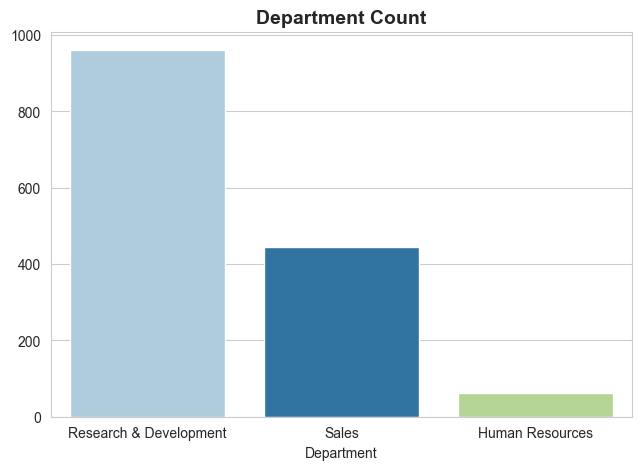

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


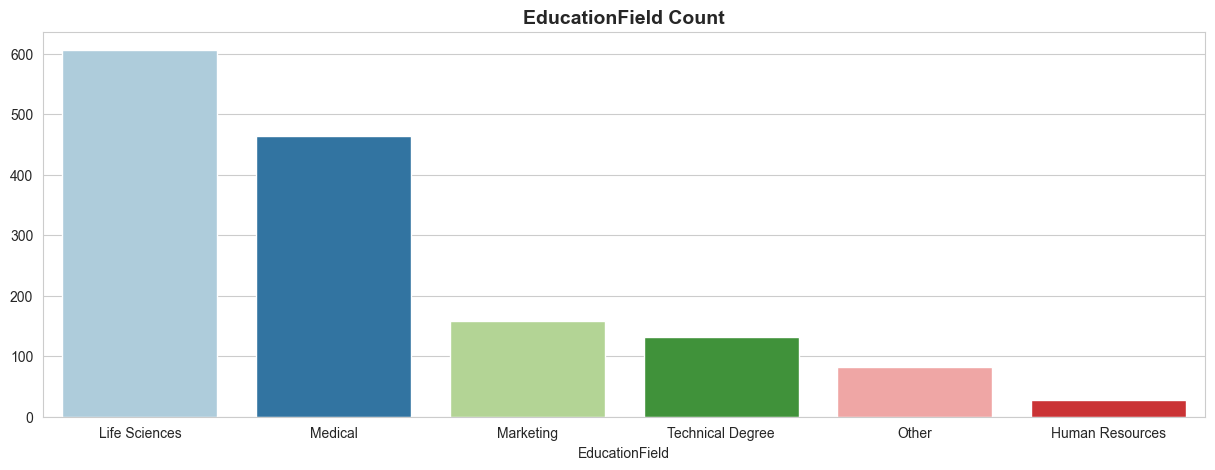

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


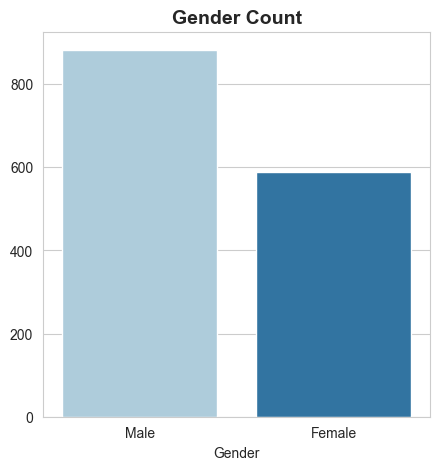

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


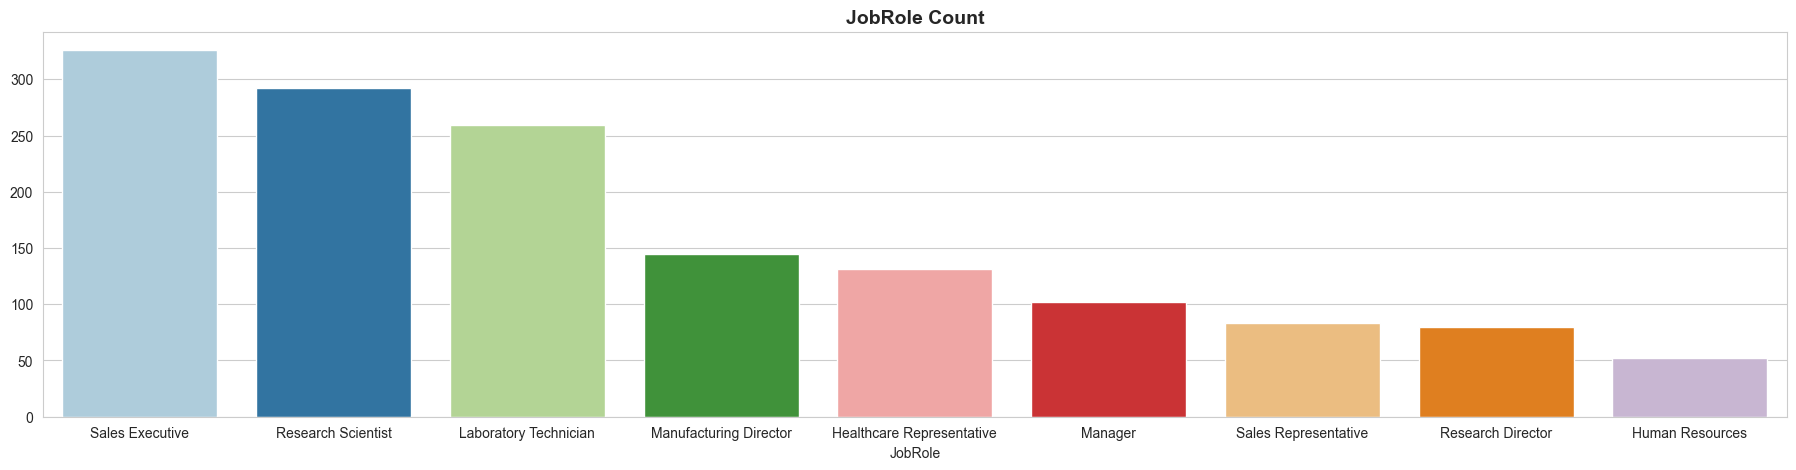

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


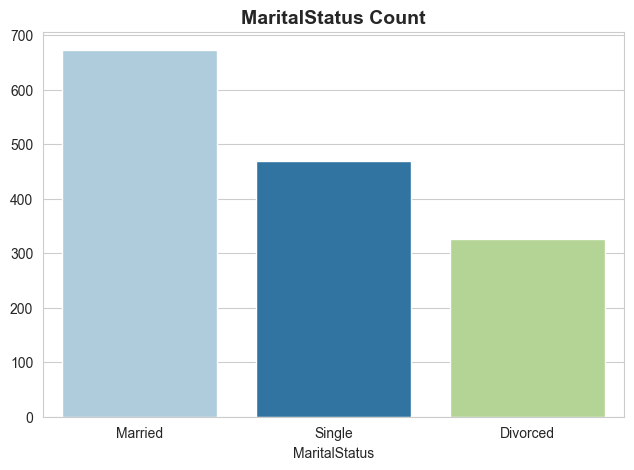

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


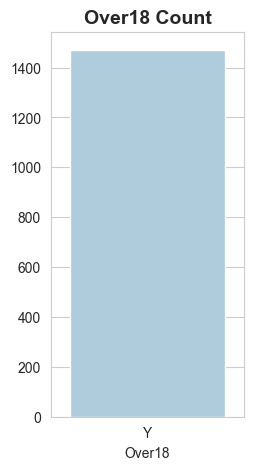

C:\Users\hp\AppData\Local\Temp\ipykernel_16212\1498050126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)


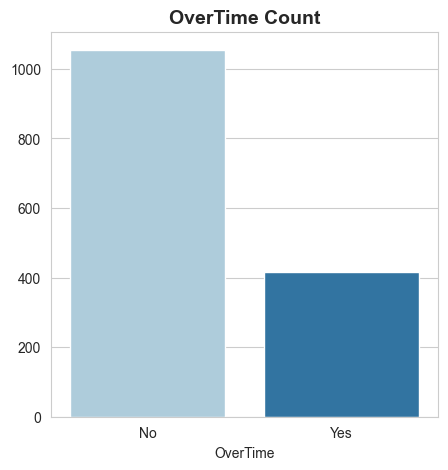

In [36]:
sns.set_style("whitegrid")
for cols in categorical_col:
    plt.figure(figsize=(len(df_copy[cols].value_counts()) * 2.5, 5))
    palette = sns.color_palette("Paired", len(df_copy[cols].value_counts()))
    sns.barplot(x=df_copy[cols].value_counts().index, y=df_copy[cols].value_counts().values, palette = palette)
    plt.title(f'{cols} Count', fontsize = 14, fontweight = 'bold')
    plt.show()

# Numerical Data

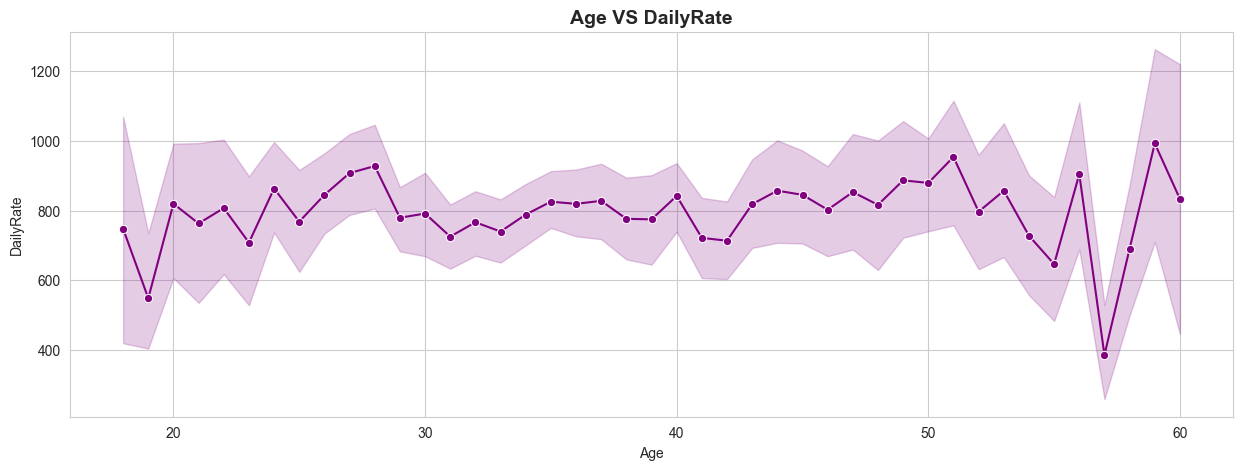

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5))
sns.lineplot(x = df_copy['Age'], y = df_copy['DailyRate'], color='purple', marker='o')
plt.title('Age VS DailyRate', fontsize = 14, fontweight = 'bold')
plt.show()

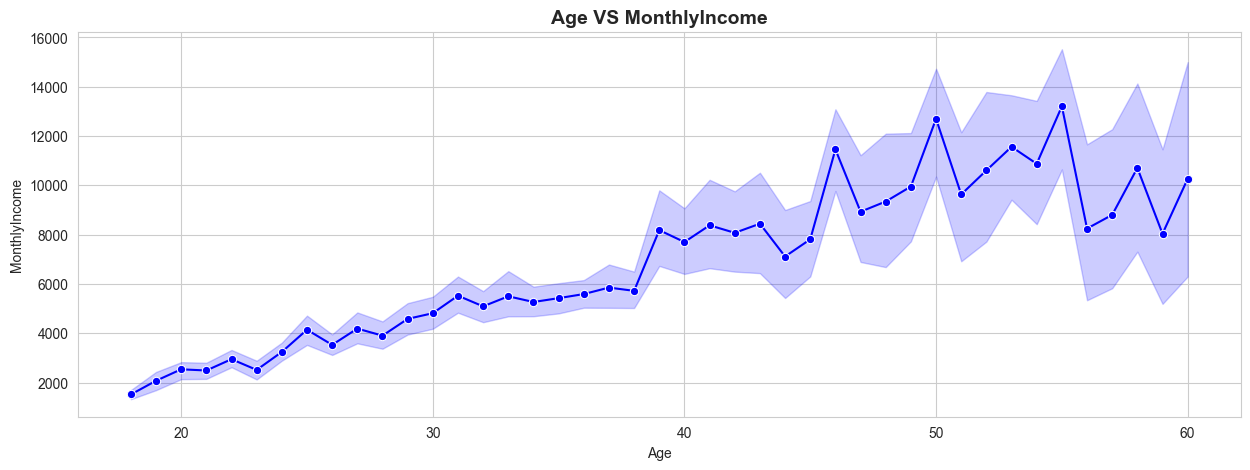

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5))
sns.lineplot(x = df_copy['Age'], y = df_copy['MonthlyIncome'], color='blue', marker='o')
plt.title('Age VS MonthlyIncome', fontsize = 14, fontweight = 'bold')
plt.show()

# Data Splitting

In [39]:
X = df.drop(columns='Attrition')
y = df['Attrition']

# Feature Engineering

In [40]:
lb = LabelEncoder()

y = lb.fit_transform(y)

categorical_col = categorical_col.drop(columns='Attrition')

for col in categorical_col:
    X[col] = lb.fit_transform(X[col])

# Train-Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [64]:
model = DecisionTreeClassifier(criterion='log_loss', splitter='random', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42, splitter='random')

# Prediction

In [65]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation

In [66]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC Score:", roc_auc)
print("Log Loss:", log_loss_value)

Accuracy: 0.8299319727891157
Precision: 0.5
Recall: 0.44
F1 Score: 0.46808510638297873
Confusion Matrix:
 [[222  22]
 [ 28  22]]
ROC-AUC Score: 0.6749180327868852
Log Loss: 6.12987302536006
